In [1]:
from QCloud import *
import numpy as np
import matplotlib.pyplot as plt

def sum_nested_list(nested_list):
    total_sum = 0
    for item in nested_list:
        if isinstance(item, list):  # If the item is a list, sum its elements
            total_sum += sum(item)
        else:  # If it's a number, add it directly
            total_sum += item
    return total_sum

def calculate_fidelity(job_records):
    num_of_devices = []
    fidelity = []
    for job_id, events in job_records.items():
        # print(f"Job ID: {job_id}, Events: {events}")
        num_of_devices.append(len(events['devc_proc']))
        fidelity.append(events['fidelity'])
    print(f'fidelity: {round(np.mean(fidelity), 5)} +/- {round(np.std(fidelity), 5)}')
    return num_of_devices, fidelity
    
def calculate_comm_time(job_records): 
    comm_time = []
    for job_id, events in job_records.items():
        # print(f"Job ID: {job_id}, Events: {events}")
        comm_time.append(events['comm_time'])
    print(f'Comm time: {round(sum_nested_list(comm_time), 5)}')

In [2]:
# deploying jobs from CSV file. 
allocation_mode = ['simple', 'smart']
num_of_devices = {}
fidelity_list = {}
PRINTLOG = False

for al_mode in allocation_mode: 
    # Create quantum devices
    ibm_strasbourg = IBM_Strasbourg(env=None, name="ibm_strasbourg", cali_filepath='QCloud/calibration/ibm_strasbourg_calibrations_2025-01-27T01_46_00Z.csv', printlog = PRINTLOG)
    ibm_brussels = IBM_Brussels(env=None, name="ibm_brussels", cali_filepath='QCloud/calibration/ibm_brussels_calibrations_2025-01-27T02_05_27Z.csv', printlog = PRINTLOG)
    ibm_kyiv = IBM_Kyiv(env=None, name="ibm_kyiv", cali_filepath='QCloud/calibration/ibm_kyiv_calibrations_2025-01-27T01_45_58Z.csv', printlog = PRINTLOG)
    ibm_quebec = IBM_Quebec(env=None, name="ibm_quebec", cali_filepath='QCloud/calibration/ibm_quebec_calibrations_2025-01-27T01_33_28Z.csv', printlog = PRINTLOG)
    ibm_kawasaki = IBM_Kawasaki(env=None, name="ibm_kawasaki", cali_filepath='QCloud/calibration/ibm_kawasaki_calibrations_2025-01-27T00_39_16Z.csv', printlog = PRINTLOG)

    devices = [ibm_strasbourg, ibm_brussels, ibm_kyiv, ibm_quebec, ibm_kawasaki]

    # Initialize and run the simulation using jobs from a CSV file
    qcloudsimenv = QCloudSimEnv(
        devices=devices,
        broker_class=ParallelBroker,
        job_feed_method="dispatcher",
        file_path="synth_job_batches/1000-large-circuits.csv", 
        allocation_mode=al_mode,
        printlog = PRINTLOG
    )
    qcloudsimenv.run()
    print(f'Allocation mode: {al_mode}')
    print(f'Total Sim-time: {qcloudsimenv.now}')

    # Calculate Fidelity and communication time
    # Access job records after the simulation
    job_records = qcloudsimenv.job_records_manager.get_job_records()
    num_of_devices[al_mode], fidelity_list[al_mode] = calculate_fidelity(job_records)
    calculate_comm_time(job_records)
    print('---------------------------')

Allocation mode: simple
Total Sim-time: 108775.38448275859
fidelity: 0.6699 +/- 0.01387
Comm time: 5707.8
---------------------------
Allocation mode: smart
Total Sim-time: 209299.9795019161
fidelity: 0.73175 +/- 0.03228
Comm time: 3822.74
---------------------------


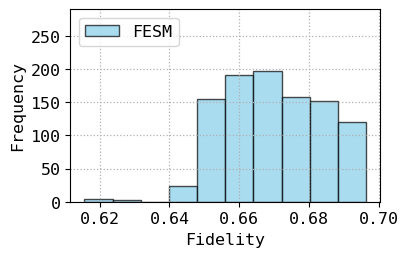

In [3]:
FONTSIZE = 12
plt.rcParams['font.family'] = 'monospace'
plt.figure(figsize=(4, 2.5))
plt.hist(fidelity_list['simple'], bins=10, color='skyblue', edgecolor='black', alpha=0.7, label="FESM")
plt.xlabel("Fidelity", fontsize=FONTSIZE)
plt.ylabel("Frequency", fontsize=FONTSIZE)
# plt.title("Fidelity Distribution")
plt.grid(True, linestyle=':', linewidth=0.9)
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.legend(loc='upper left', fontsize=FONTSIZE)
plt.ylim(0, 290)
plt.show()

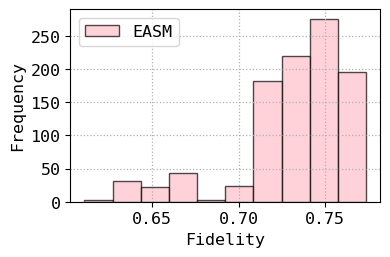

In [4]:
plt.figure(figsize=(4, 2.5))
plt.hist(fidelity_list['smart'], bins=10, color='pink', edgecolor='black', alpha=0.7, label='EASM')
plt.xlabel("Fidelity", fontsize=FONTSIZE)
plt.ylabel("Frequency", fontsize=FONTSIZE)
# plt.title("Fidelity Distribution")
plt.grid(True, linestyle=':', linewidth=0.9)
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.legend(loc='upper left', fontsize=FONTSIZE)
plt.ylim(0, 290)
plt.show()